In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_hdf('DSI-7.hdf')

In [3]:
df

,case,test,window,seizure,F3-C3,F4-C4,C3-P3,C4-P4,elapsed time,cpu usage,memory usage
0,chb01,0,0,False,5.974126,5.781400,5.512350,5.415369,5.143914,96.9,1651286016
0,chb01,0,1,False,5.935654,6.027476,5.688999,5.589532,4.289692,96.8,1446494208
0,chb01,0,2,False,5.834751,5.881431,5.701357,5.635897,4.453572,97.4,1447256064
0,chb01,0,3,False,5.888986,5.671197,5.355293,5.566865,4.317407,98.0,1446875136
0,chb01,0,4,False,6.203580,6.146401,5.713649,5.799418,4.254425,97.2,1443860480
...,...,...,...,...,...,...,...,...,...,...,...
0,chb03,1,406,False,4.920996,5.170088,4.744472,4.981009,5.883118,97.9,1691230208
0,chb03,1,407,False,5.588694,5.765972,5.256462,5.417712,5.848237,97.9,1695297536
0,chb03,1,408,False,5.673596,5.827443,5.351489,5.479107,5.806324,97.7,1698447360
0,chb03,1,409,False,5.380997,5.556920,4.895023,5.154242,6.042478,98.3,1698291712


In [11]:
predictors = df[['F3-C3', 'F4-C4','C3-P3','C4-P4']]

In [14]:
targets = df.seizure

In [31]:
#Creación de la muestra de entrenamiento y de test, tanto para las variables de predictores (canales) y la variables objetivo (seizure), siendo un test del 50%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.5)

In [32]:
classifier=RandomForestClassifier(n_estimators=25) #Indicar el número de arboles en este caso 25

In [33]:
classifier=classifier.fit(pred_train,tar_train) #Construir el modelo con los datos de entrenamiento

In [34]:
predictions=classifier.predict(pred_test)

In [35]:
sklearn.metrics.confusion_matrix(tar_test,predictions) #Matriz de confusión de las predicciones para el grupo de test

array([[3104,    6],
       [  39,   23]], dtype=int64)

In [36]:
sklearn.metrics.accuracy_score(tar_test, predictions) #Obtener el indice de Accurancy que resume la matriz de confusión y la cantidad de aciertos

0.9858133669609079

In [37]:
model = ExtraTreesClassifier() #obtener la importancia de cada variable

In [38]:
model.fit(pred_train,tar_train) #Ajustar el modelo

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
print(model.feature_importances_) # Imprimir la importancia de cada variable (Columna de los canales)

[0.27848677 0.25648033 0.20719785 0.25783504]


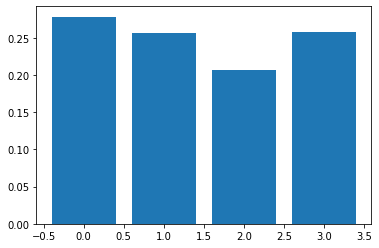

In [40]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show() #Dibujar las variables con su respectiva importancia

In [41]:
trees=range(25)
accuracy=np.zeros(25)

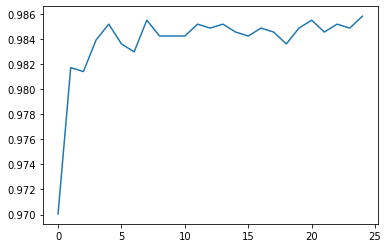

In [42]:
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
plt.cla()
plt.plot(trees, accuracy)

In [ ]:
#La gráfica del renglon anterior funciona para saber si el número de arbiles generados fue suficiente o no